<a href="https://colab.research.google.com/github/ManojAthreya/ML_Learning/blob/main/ML_Assign_1f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

In [ ]:
dataset = pd.read_csv("/content/dataset.csv")

In [ ]:
dataset.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [ ]:
dataset.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [ ]:
dataset.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [ ]:
df = dataset.copy()

In [ ]:
columns = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [ ]:
for i in range(len(columns)):
    df.loc[((df[columns[i]]==0) | (df[columns[i]]==1)),columns[i]] = 'Non-user'
    df.loc[((df[columns[i]]==2) | (df[columns[i]]==3) | (df[columns[i]]==4) | (df[columns[i]]==5) | (df[columns[i]]==6)),columns[i]] = 'User'

In [ ]:
count_of_users = []
count_of_non_users = []

In [ ]:
for i in range(len(columns)):
    s = df.groupby([columns[i]])[columns[i]].count()
    count_of_users.append(s[1])
    count_of_non_users.append(s[0])

In [ ]:
x=count_of_users
y=count_of_non_users
print(x)
print(y)

[1817, 679, 370, 769, 1848, 1265, 1850, 687, 191, 751, 212, 350, 762, 557, 417, 694, 1264, 6, 230]
[68, 1206, 1515, 1116, 37, 620, 35, 1198, 1694, 1134, 1673, 1535, 1123, 1328, 1468, 1191, 621, 1879, 1655]


In [ ]:
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [ ]:
df[columns]

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0
2,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1
1881,1,0,0,0,1,1,1,0,0,1,0,0,1,1,1,1,1,0,0
1882,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0,0
1883,1,0,0,0,1,1,1,0,0,1,0,0,1,1,0,1,1,0,0


In [ ]:
features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
target = ['VSA']

X = df[features].values
y = df[target].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.33)

KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8539325842696629


In [ ]:
from sklearn import metrics
def plot_confusion_metrix(y_test,y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    classNames = ['Non-User','User']
    plt.title('Confusion Matrix')
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [ ]:
def report_performance(model):
    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, y_pred)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, y_pred))
    plot_confusion_metrix(y_test, y_pred)



Confusion Matrix:
[[526  16]
 [ 75   6]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       542
           1       0.27      0.07      0.12        81

    accuracy                           0.85       623
   macro avg       0.57      0.52      0.52       623
weighted avg       0.80      0.85      0.82       623



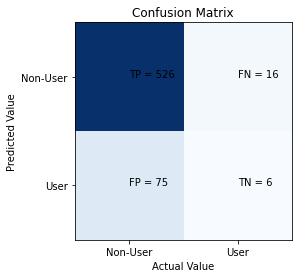

In [ ]:
report_performance(knn) 

In [ ]:
from sklearn.metrics import roc_curve,auc
def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='red', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-.')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-Curve')
    plt.legend(loc="lower right")
    plt.show()

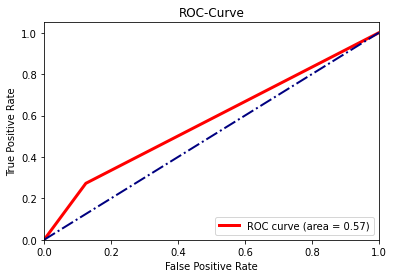

In [ ]:
roc_curves(knn)

SVM Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel="linear", C=1,random_state=42)
svm.fit(X_train, y_train.ravel())

SVC(C=1, kernel='linear', random_state=42)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.869983948635634




Confusion Matrix:
[[542   0]
 [ 81   0]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       542
           1       0.00      0.00      0.00        81

    accuracy                           0.87       623
   macro avg       0.43      0.50      0.47       623
weighted avg       0.76      0.87      0.81       623



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


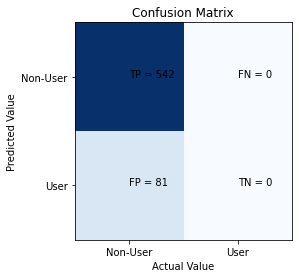

In [ ]:
report_performance(svm) 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


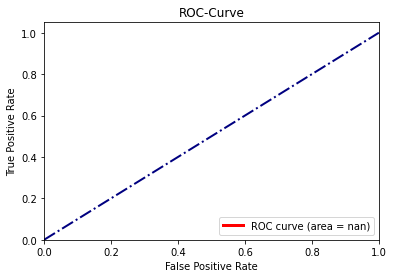

In [ ]:
roc_curves(svm)

DECISION TREES

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train.ravel())

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.8057784911717496




Confusion Matrix:
[[482  60]
 [ 61  20]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       542
           1       0.25      0.25      0.25        81

    accuracy                           0.81       623
   macro avg       0.57      0.57      0.57       623
weighted avg       0.80      0.81      0.81       623



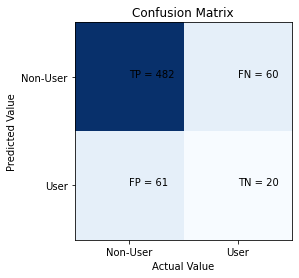

In [ ]:
report_performance(dt) 

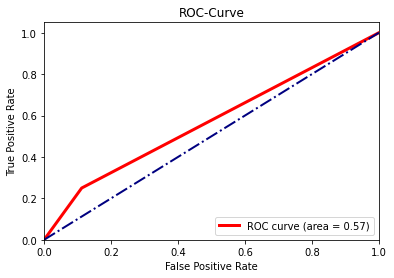

In [ ]:
roc_curves(dt)

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.8683788121990369




Confusion Matrix:
[[536   6]
 [ 76   5]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       542
           1       0.45      0.06      0.11        81

    accuracy                           0.87       623
   macro avg       0.67      0.53      0.52       623
weighted avg       0.82      0.87      0.82       623



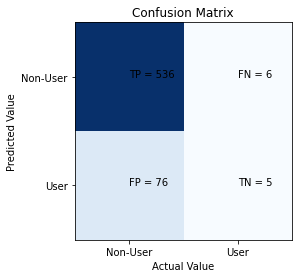

In [ ]:
report_performance(rf) 

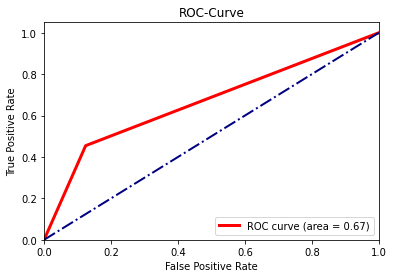

In [ ]:
roc_curves(rf)